# Chinese Automobile Company Case Study

In [533]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [534]:
#Importing dataset
car_df = pd.read_csv('E:/AIML/Machine Learning/CaseStudy/CarPrice_Assignment.csv')
# Looking at the first five rows
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [535]:
# summing up the missing values (column-wise)
print(car_df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [536]:
# What type of values are stored in the columns?
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [537]:
#change car name take first word only
car_df['carcompany'] = car_df['CarName'].apply(lambda x: x.split(' ')[0])
# Dropping CarName as we have created the "carcompany" for it
car_df.drop(['CarName'],axis=1,inplace=True)
#Rename carcompany to CarName
car_df.rename(columns={'carcompany': 'CarName'}, inplace=True)
# Dropping car_ID as it is irrelevant
car_df.drop(['car_ID'],axis=1,inplace=True)
car_df.reset_index()
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [538]:
# Finding the Unique Car Name
car_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [539]:
# Transforming the Car Name into Correct one
car_df['CarName'] = car_df['CarName'].str.replace('maxda','mazda')
car_df['CarName'] = car_df['CarName'].str.replace('Nissan','nissan')
car_df['CarName'] = car_df['CarName'].str.replace('porcshce','porsche')
car_df['CarName'] = car_df['CarName'].str.replace('toyouta','toyota')
car_df['CarName'] = car_df['CarName'].str.replace('vokswagen','volkswagen')
car_df['CarName'] = car_df['CarName'].str.replace('vw','volkswagen')
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Scatter Plot on numeric data and apply linear regression

Text(0,0.5,'price')

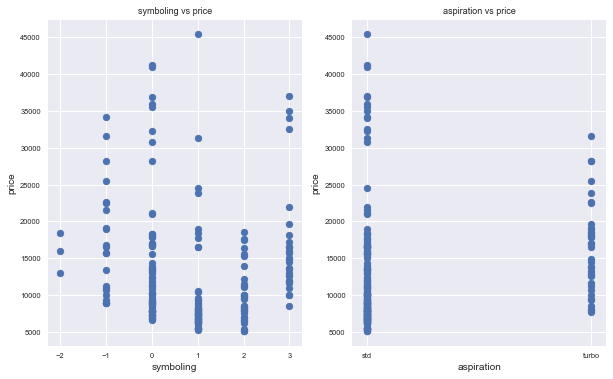

In [540]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['symboling'],car_df['price'])
plt.title("symboling vs price")
plt.xlabel('symboling', fontsize=10)
plt.ylabel('price', fontsize=10)
#cannot take this as it does not have any relation
plt.subplot(1, 2, 2)
plt.scatter(car_df['aspiration'],car_df['price'])
plt.title("aspiration vs price")
plt.xlabel('aspiration', fontsize=10)
plt.ylabel('price', fontsize=10)
# Std Price is more than turbo price which is not expected

Text(0,0.5,'price')

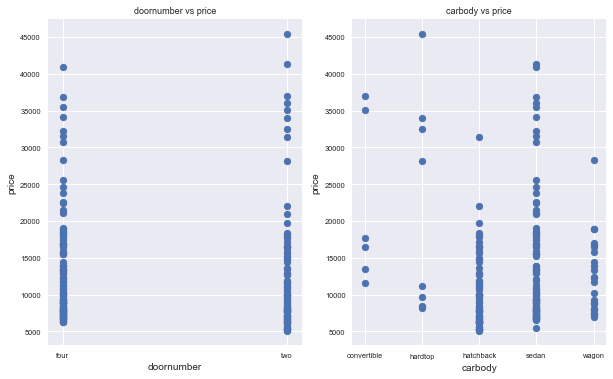

In [541]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['doornumber'],car_df['price'])
plt.title("doornumber vs price")
plt.xlabel('doornumber', fontsize=10)
plt.ylabel('price', fontsize=10)
# 2 door Price is more than 4 door
plt.subplot(1, 2, 2)
plt.scatter(car_df['carbody'],car_df['price'])
plt.title("carbody vs price")
plt.xlabel('carbody', fontsize=10)
plt.ylabel('price', fontsize=10)
# Hard Top, Sedan Price is slightly more

Text(0,0.5,'price')

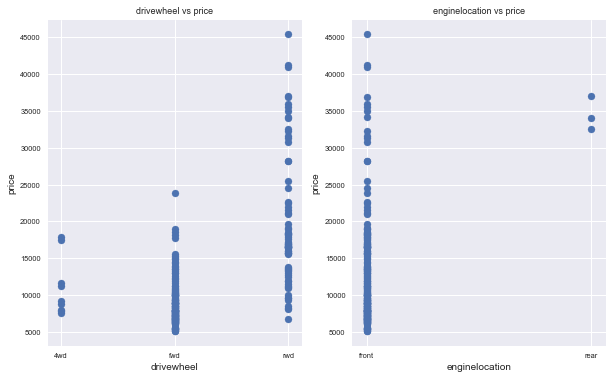

In [542]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['drivewheel'],car_df['price'])
plt.title("drivewheel vs price")
plt.xlabel('drivewheel', fontsize=10)
plt.ylabel('price', fontsize=10)
# Rear wheel Price is more
plt.subplot(1, 2, 2)
plt.scatter(car_df['enginelocation'],car_df['price'])
plt.title("enginelocation vs price")
plt.xlabel('enginelocation', fontsize=10)
plt.ylabel('price', fontsize=10)
# front engine Price is more than rear

Text(0,0.5,'price')

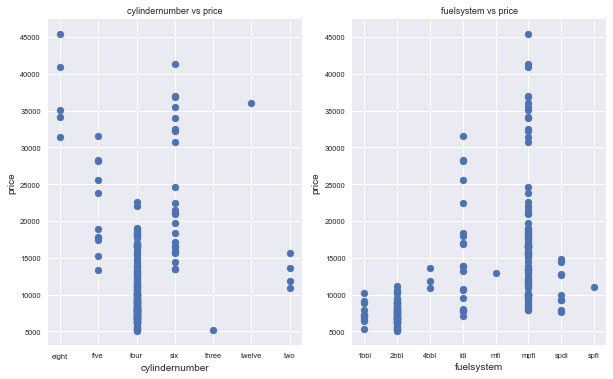

In [543]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['cylindernumber'],car_df['price'])
plt.title("cylindernumber vs price")
plt.xlabel('cylindernumber', fontsize=10)
plt.ylabel('price', fontsize=10)
# More cylinder price is more
plt.subplot(1, 2, 2)
plt.scatter(car_df['fuelsystem'],car_df['price'])
plt.title("fuelsystem vs price")
plt.xlabel('fuelsystem', fontsize=10)
plt.ylabel('price', fontsize=10)
# mpfi and idi  cars are more priced

Text(0,0.5,'price')

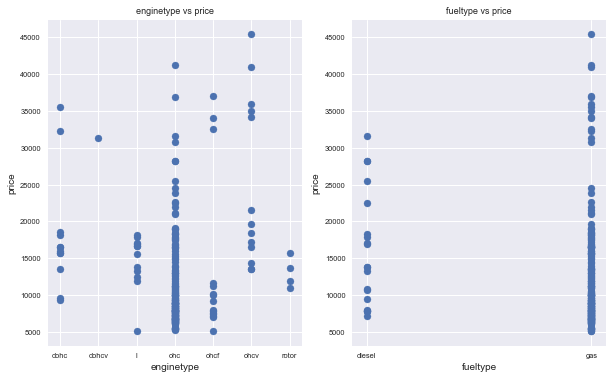

In [544]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['enginetype'],car_df['price'])
plt.title("enginetype vs price")
plt.xlabel('enginetype', fontsize=10)
plt.ylabel('price', fontsize=10)
# ohcv, ohc, ohcf, dohc is costlier
plt.subplot(1, 2, 2)
plt.scatter(car_df['fueltype'],car_df['price'])
plt.title("fueltype vs price")
plt.xlabel('fueltype', fontsize=10)
plt.ylabel('price', fontsize=10)
# gas is more costlier

Text(0,0.5,'price')

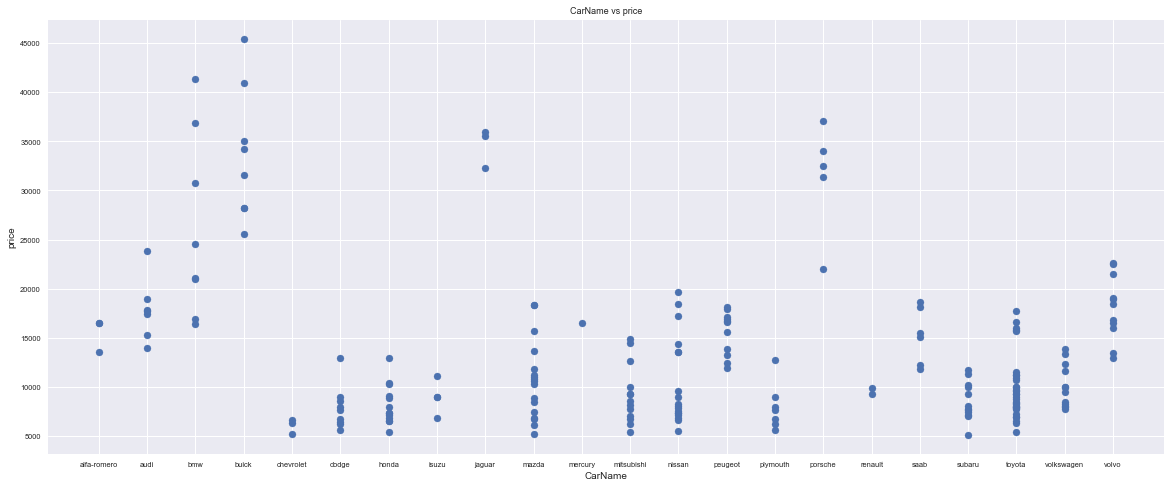

In [545]:
plt.figure(figsize=(20, 8))
plt.scatter(car_df['CarName'],car_df['price'])
plt.title("CarName vs price")
plt.xlabel('CarName', fontsize=10)
plt.ylabel('price', fontsize=10)
# BMW,BUICK,JAGUAR,PORCHE are high priced >30000

Text(0,0.5,'price')

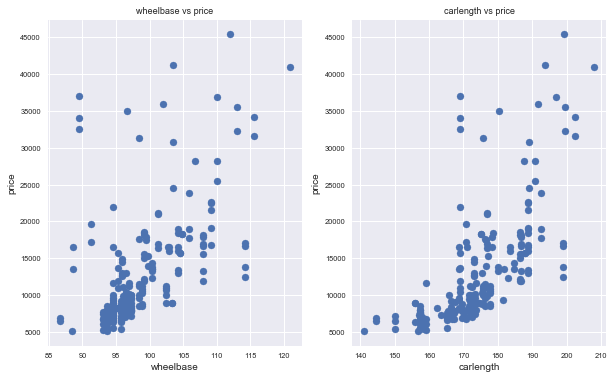

In [546]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['wheelbase'],car_df['price'])
plt.title("wheelbase vs price")
plt.xlabel('wheelbase', fontsize=10)
plt.ylabel('price', fontsize=10)
# wheel base increases price increases
plt.subplot(1, 2, 2)
plt.scatter(car_df['carlength'],car_df['price'])
plt.title("carlength vs price")
plt.xlabel('carlength', fontsize=10)
plt.ylabel('price', fontsize=10)
# length increases price increases

Text(0,0.5,'price')

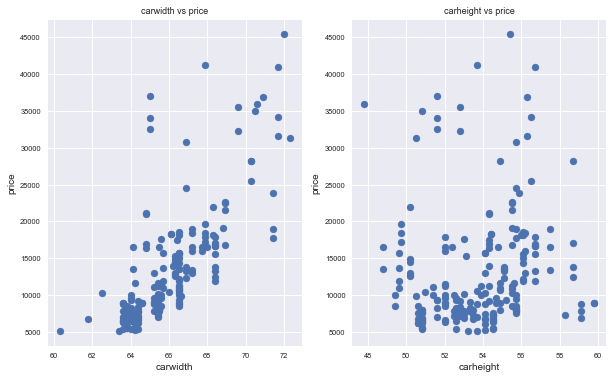

In [547]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['carwidth'],car_df['price'])
plt.title("carwidth vs price")
plt.xlabel('carwidth', fontsize=10)
plt.ylabel('price', fontsize=10)
# car width increases price increases
plt.subplot(1, 2, 2)
plt.scatter(car_df['carheight'],car_df['price'])
plt.title("carheight vs price")
plt.xlabel('carheight', fontsize=10)
plt.ylabel('price', fontsize=10)
# car height has no effect on price

Text(0,0.5,'price')

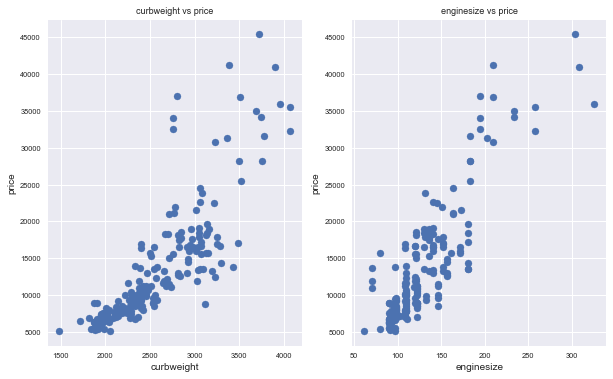

In [548]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['curbweight'],car_df['price'])
plt.title("curbweight vs price")
plt.xlabel('curbweight', fontsize=10)
plt.ylabel('price', fontsize=10)
# curb weight increses price increses
plt.subplot(1, 2, 2)
plt.scatter(car_df['enginesize'],car_df['price'])
plt.title("enginesize vs price")
plt.xlabel('enginesize', fontsize=10)
plt.ylabel('price', fontsize=10)
# engine size increses price increses

Text(0,0.5,'price')

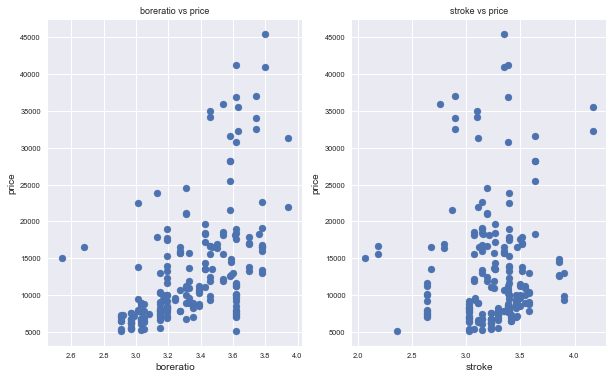

In [549]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['boreratio'],car_df['price'])
plt.title("boreratio vs price")
plt.xlabel('boreratio', fontsize=10)
plt.ylabel('price', fontsize=10)
# we cannot take this as it does not have impact on price
plt.subplot(1, 2, 2)
plt.scatter(car_df['stroke'],car_df['price'])
plt.title("stroke vs price")
plt.xlabel('stroke', fontsize=10)
plt.ylabel('price', fontsize=10)
# we cannot take this as it does not have impact on price

Text(0,0.5,'price')

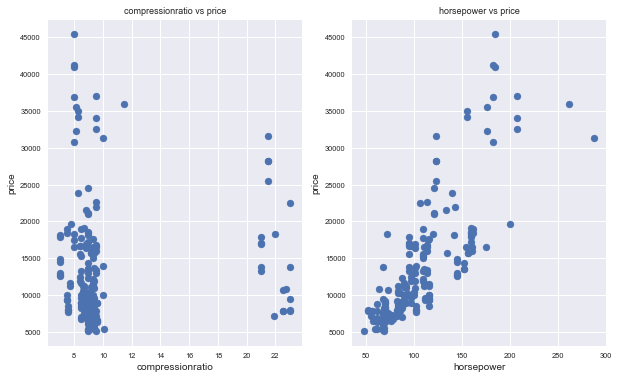

In [550]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['compressionratio'],car_df['price'])
plt.title("compressionratio vs price")
plt.xlabel('compressionratio', fontsize=10)
plt.ylabel('price', fontsize=10)
# we cannot take this as it does not have impact on price
plt.subplot(1, 2, 2)
plt.scatter(car_df['horsepower'],car_df['price'])
plt.title("horsepower vs price")
plt.xlabel('horsepower', fontsize=10)
plt.ylabel('price', fontsize=10)
# price increases as HP increases

Text(0,0.5,'price')

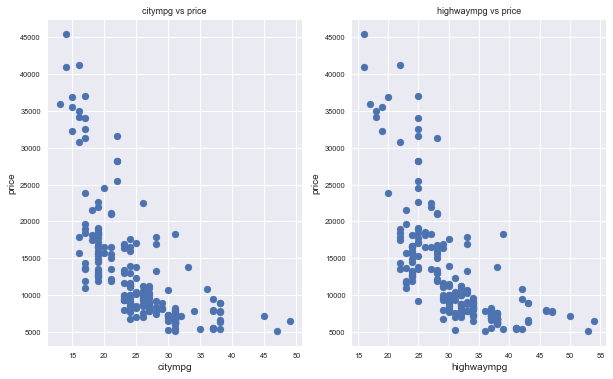

In [551]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(car_df['citympg'],car_df['price'])
plt.title("citympg vs price")
plt.xlabel('citympg', fontsize=10)
plt.ylabel('price', fontsize=10)
# high price car low on city milage
plt.subplot(1, 2, 2)
plt.scatter(car_df['highwaympg'],car_df['price'])
plt.title("highwaympg vs price")
plt.xlabel('highwaympg', fontsize=10)
plt.ylabel('price', fontsize=10)
# high price car low on highway milage

# Correlation for Multivariate Analysis

In [552]:
# Correlation
# 'fueltype', 'aspiration', 'doornumber', 'drivewheel' , 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
features = ['symboling', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight',
            'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg',
           'price'] 
car_df_corr = car_df[features]
car_df_corr.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


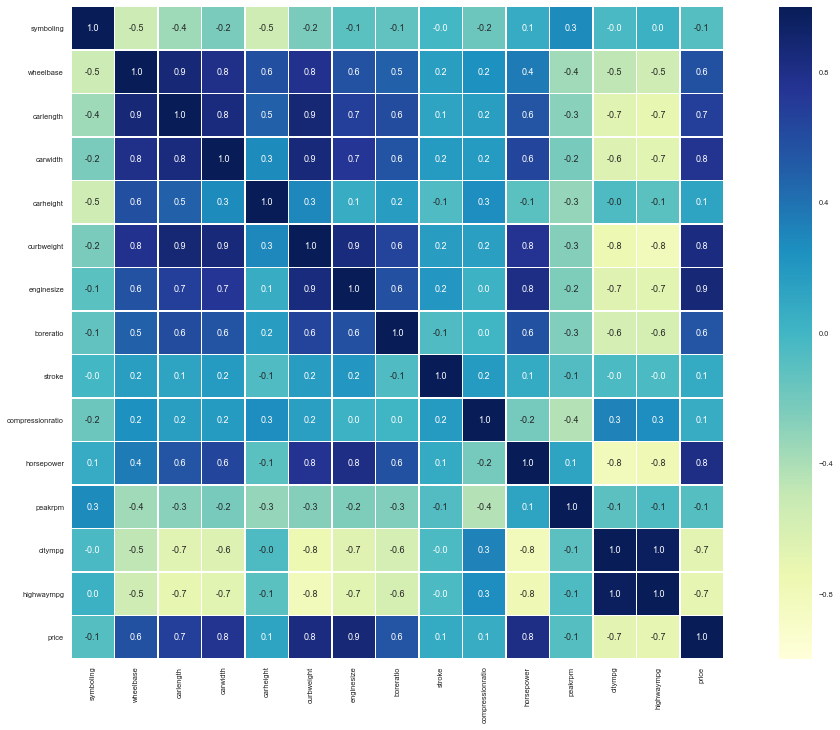

In [553]:
plt.figure(figsize=(20, 12))
sns.set()
sns.set(font_scale=.75)

ax = sns.heatmap(car_df_corr[car_df_corr.columns[0:]].corr(),annot=True,fmt=".1f", vmin=-1, vmax=1, linewidths=.5, cmap="YlGnBu", square=True)
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

In [554]:
# Creating data for Catagorical variables Numeric Modelbuilding
# 'CarName','fueltype','aspiration','doornumber','carbody','enginelocation','drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'
car_df['fueltype'] = car_df['fueltype'].map({'gas': 0, 'diesel' : 1})
car_df['aspiration'] = car_df['aspiration'].map({'std' : 0, 'turbo' : 1})
car_df['doornumber'] = car_df['doornumber'].map({'two' : 0, 'four': 1})
car_df['enginelocation'] = car_df['enginelocation'].map({'front' : 0, 'rear': 1})
newfeature = ['fueltype','aspiration','doornumber','enginelocation' ]
newCategory=car_df[newfeature]
categoryDummy = pd.get_dummies(newCategory)
categoryDummy.head()

,fueltype,aspiration,doornumber,enginelocation
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,1,0


In [581]:
# Multilevel variable converting to dummy
newmultivarfeature = ['CarName','carbody','drivewheel','enginetype','cylindernumber', 'fuelsystem']
newMulVarCategory=car_df[newmultivarfeature]
categoryMulVarDummy = pd.get_dummies(newMulVarCategory)
#categoryMulVarDummy.drop(columns=['CarName','carbody','drivewheel','enginetype','cylindernumber', 'fuelsystem'])
categoryMulVarDummy.head()

,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [582]:
# Creating data set for Linear Regression Model Buiding 
dum_car_df = car_df_corr.join(categoryDummy)
#dum_car_df = dum_car_df.join(categoryMulVarDummy)
dum_car_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype,aspiration,doornumber,enginelocation
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0


### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [583]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
dum_car_df = dum_car_df.apply(normalize) 

In [584]:
dum_car_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype,aspiration,doornumber,enginelocation
0,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.005419,-0.097561,-0.180488,-0.560976,-0.014634
1,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.080018,-0.097561,-0.180488,-0.560976,-0.014634
2,0.033171,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,0.102184,-0.071409,0.207846,-0.051070,-0.172764,-0.125032,0.080018,-0.097561,-0.180488,-0.560976,-0.014634
3,0.233171,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,0.153011,-0.033875,-0.019769,0.016714,-0.097561,-0.180488,0.439024,-0.014634
4,0.233171,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,0.068850,-0.133909,0.045346,0.153011,-0.200542,-0.230295,0.103602,-0.097561,-0.180488,0.439024,-0.014634


In [585]:
# Putting data set to X
#X = dum_car_df
# removing price
X = dum_car_df.loc[:, dum_car_df.columns != 'price']
# Putting dependent variable to y
y = dum_car_df['price']

In [586]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

# Building a linear model

# #Model 1

In [587]:
## Building a linear model
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [588]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     42.28
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           3.48e-44
Time:                        21:25:57   Log-Likelihood:                 172.76
No. Observations:                 143   AIC:                            -307.5
Df Residuals:                     124   BIC:                            -251.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0037      0.007  

In [589]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [590]:
# Calculating Vif value
vif_cal(input_data=dum_car_df, dependent_col="price")

,Var,Vif
14,fueltype,88.46
9,compressionratio,78.57
12,citympg,31.82
13,highwaympg,28.01
5,curbweight,17.21
10,horsepower,11.95
2,carlength,10.51
6,enginesize,10.34
1,wheelbase,8.74
3,carwidth,5.85


# Dropping the Variable and Updating the Model

# # Model 2

In [591]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fueltype', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     45.07
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           5.42e-45
Time:                        21:26:05   Log-Likelihood:                 172.68
No. Observations:                 143   AIC:                            -309.4
Df Residuals:                     125   BIC:                            -256.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0037      0.007  

In [575]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(["fueltype"], axis=1), dependent_col="price")

,Var,Vif
12,citympg,30.92
13,highwaympg,27.89
5,curbweight,16.98
10,horsepower,11.11
2,carlength,10.30
6,enginesize,10.26
1,wheelbase,8.69
3,carwidth,5.84
0,symboling,2.57
9,compressionratio,2.57


# # Model 3

In [592]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('aspiration', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     48.26
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           7.74e-46
Time:                        21:27:42   Log-Likelihood:                 172.67
No. Observations:                 143   AIC:                            -311.3
Df Residuals:                     126   BIC:                            -261.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0037      0.007  

In [594]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype'], axis=1), dependent_col="price")

,Var,Vif
12,citympg,28.83
13,highwaympg,25.21
5,curbweight,16.76
2,carlength,10.09
10,horsepower,8.75
1,wheelbase,8.61
6,enginesize,7.14
3,carwidth,5.83
0,symboling,2.56
4,carheight,2.43


# # Model 4

In [595]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('citympg', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     51.55
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           1.50e-46
Time:                        21:31:11   Log-Likelihood:                 172.27
No. Observations:                 143   AIC:                            -312.5
Df Residuals:                     127   BIC:                            -265.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0037      0.007  

In [596]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg'], axis=1), dependent_col="price")

,Var,Vif
5,curbweight,16.76
2,carlength,9.48
1,wheelbase,8.47
10,horsepower,7.96
6,enginesize,6.76
3,carwidth,5.83
12,highwaympg,5.81
0,symboling,2.46
4,carheight,2.43
13,doornumber,2.29


# # Model 5

In [597]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('highwaympg', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     55.66
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           1.97e-47
Time:                        21:33:03   Log-Likelihood:                 172.27
No. Observations:                 143   AIC:                            -314.5
Df Residuals:                     128   BIC:                            -270.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0037      0.007  

In [598]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg'], axis=1), dependent_col="price")

,Var,Vif
5,curbweight,12.99
2,carlength,9.27
1,wheelbase,8.46
10,horsepower,7.85
6,enginesize,6.46
3,carwidth,5.82
0,symboling,2.44
4,carheight,2.41
12,doornumber,2.28
7,boreratio,2.14


# # Model 6

In [599]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           2.50e-48
Time:                        21:35:19   Log-Likelihood:                 172.25
No. Observations:                 143   AIC:                            -316.5
Df Residuals:                     129   BIC:                            -275.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0036      0.006  

In [600]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight'], axis=1), dependent_col="price")

,Var,Vif
4,curbweight,12.93
2,carlength,8.93
1,wheelbase,7.91
9,horsepower,7.74
5,enginesize,6.30
3,carwidth,5.69
0,symboling,2.39
11,doornumber,2.25
6,boreratio,2.13
10,peakrpm,2.08


# # Model 7

In [601]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('doornumber', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     65.83
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           3.30e-49
Time:                        21:36:36   Log-Likelihood:                 172.15
No. Observations:                 143   AIC:                            -318.3
Df Residuals:                     130   BIC:                            -279.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0036      0.006  

In [602]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight','doornumber'], axis=1), dependent_col="price")

,Var,Vif
4,curbweight,12.93
2,carlength,7.98
1,wheelbase,7.80
9,horsepower,7.58
5,enginesize,6.22
3,carwidth,5.69
6,boreratio,2.13
10,peakrpm,2.08
0,symboling,1.68
8,compressionratio,1.67


# # Model 8

In [603]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carlength', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     71.66
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           6.51e-50
Time:                        21:37:56   Log-Likelihood:                 171.55
No. Observations:                 143   AIC:                            -319.1
Df Residuals:                     131   BIC:                            -283.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0039      0.006  

In [604]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength'], axis=1), dependent_col="price")

,Var,Vif
3,curbweight,10.86
8,horsepower,7.56
1,wheelbase,6.23
4,enginesize,6.15
2,carwidth,5.55
5,boreratio,2.09
9,peakrpm,2.08
0,symboling,1.68
7,compressionratio,1.65
10,enginelocation,1.51


# # Model 9

In [606]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wheelbase', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     78.63
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           1.25e-50
Time:                        21:40:17   Log-Likelihood:                 170.93
No. Observations:                 143   AIC:                            -319.9
Df Residuals:                     132   BIC:                            -287.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0033      0.006  

In [605]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength','wheelbase'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,8.36
7,horsepower,6.40
3,enginesize,6.15
1,carwidth,4.38
4,boreratio,2.07
8,peakrpm,2.07
6,compressionratio,1.63
9,enginelocation,1.50
0,symboling,1.25
5,stroke,1.19


# # Model 10

In [607]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('symboling', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     86.94
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           2.61e-51
Time:                        21:44:43   Log-Likelihood:                 170.17
No. Observations:                 143   AIC:                            -320.3
Df Residuals:                     133   BIC:                            -290.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0031      0.006  

In [608]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength','wheelbase','symboling'], axis=1), dependent_col="price")

,Var,Vif
1,curbweight,8.08
2,enginesize,6.15
6,horsepower,6.04
0,carwidth,4.36
3,boreratio,2.07
7,peakrpm,2.07
5,compressionratio,1.63
8,enginelocation,1.49
4,stroke,1.18


# # Model 11

In [609]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('boreratio', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     96.37
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           9.00e-52
Time:                        21:46:02   Log-Likelihood:                 168.81
No. Observations:                 143   AIC:                            -319.6
Df Residuals:                     134   BIC:                            -293.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0040      0.006  

In [610]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength','wheelbase','symboling','boreratio'], axis=1), dependent_col="price")

,Var,Vif
1,curbweight,7.68
2,enginesize,6.08
5,horsepower,5.86
0,carwidth,4.34
6,peakrpm,1.90
4,compressionratio,1.60
7,enginelocation,1.45
3,stroke,1.15


# # Model 12

In [611]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('curbweight', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           5.45e-51
Time:                        21:46:56   Log-Likelihood:                 164.34
No. Observations:                 143   AIC:                            -312.7
Df Residuals:                     135   BIC:                            -289.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0044      0.007  

In [612]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength','wheelbase','symboling','boreratio',
                                   'curbweight'], axis=1), dependent_col="price")

,Var,Vif
1,enginesize,5.43
4,horsepower,5.22
0,carwidth,2.88
5,peakrpm,1.84
3,compressionratio,1.55
6,enginelocation,1.42
2,stroke,1.15


# # Model 13

In [613]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('peakrpm', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     118.8
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           1.40e-51
Time:                        21:48:40   Log-Likelihood:                 163.19
No. Observations:                 143   AIC:                            -312.4
Df Residuals:                     136   BIC:                            -291.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0044      0.007  

In [614]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength','wheelbase','symboling','boreratio',
                                   'curbweight','peakrpm'], axis=1), dependent_col="price")

,Var,Vif
4,horsepower,4.23
1,enginesize,4.01
0,carwidth,2.88
3,compressionratio,1.40
5,enginelocation,1.38
2,stroke,1.12


# # Model 14

In [615]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('stroke', 1)
lm = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.6
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           2.58e-52
Time:                        21:50:20   Log-Likelihood:                 162.31
No. Observations:                 143   AIC:                            -312.6
Df Residuals:                     137   BIC:                            -294.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0045      0.007  

In [616]:
# Calculating Vif value
vif_cal(input_data=dum_car_df.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength','wheelbase','symboling','boreratio',
                                   'curbweight','peakrpm','stroke'], axis=1), dependent_col="price")

,Var,Vif
3,horsepower,4.23
1,enginesize,3.90
0,carwidth,2.87
2,compressionratio,1.37
4,enginelocation,1.34


## Making Predictions Using Model

In [618]:
# Adding  constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [619]:
# Creating X_test_m7 dataframe by dropping variables from X_test_m7
X_test = X_test.drop(['aspiration','fueltype','citympg','highwaympg','carheight',
                                    'doornumber','carlength','wheelbase','symboling','boreratio',
                                   'curbweight','peakrpm','stroke' 
                              ], axis=1)

In [621]:
# Making predictions
y_pred = lm.predict(X_test)

## Model Evaluation

Text(0,0.5,'Car Price')

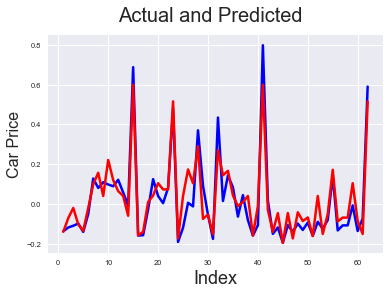

In [622]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

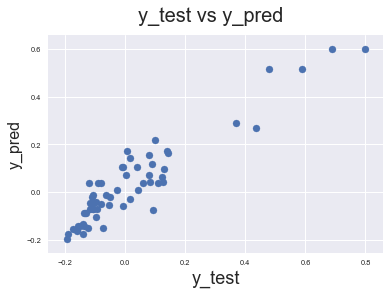

In [623]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Text(0,0.5,'ytest-ypred')

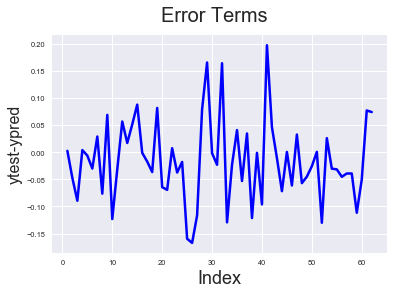

In [624]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

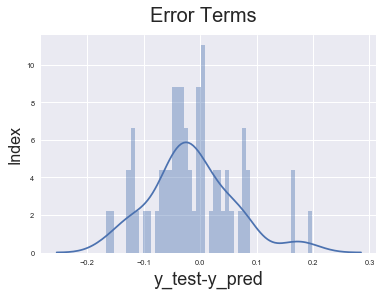

In [625]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [626]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.07576097104332395
